# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

# Content
- [Import](#import)
- [Presentation](#presentation)
- [Load data](#load_data)
- [Preliminary Data Exploration](#Data_Exploration)
- [Data Cleaning - Check for Missing Values and Duplicates](#Data_Cleaning)
- [Chart the Poverty Rate in each US State](#Poverty_Rate)
- [Chart the High School Graduation Rate by US State](#Graduation_Rate)
- [Visualise the Relationship between Poverty Rates and High School Graduation Rates](#Poverty_Graduation)
- [Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State](#Racial_Makeup)
- [Create Donut Chart by of People Killed by Race](#People_Killed)
- [Create a Chart Comparing the Total Number of Deaths of Men and Women](#Men_Women)
- [Create a Box Plot Showing the Age and Manner of Death](#Age_Manner)
- [Were People Armed? ](#Armed)
- [How Old Were the People Killed?](#Age)
- [Race of People Killed](#Race)
- [Mental Illness and Police Killings](#Mental)
- [In Which Cities Do the Most Police Killings Take Place?](#Cities)
- [Rate of Death by Race](#Death_Race)
- [Create a Choropleth Map of Police Killings by US State](#Police_Killings)
- [Number of Police Killings Over Time](#Time)
- [Epilogue](#Epilogue)

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     |████████████████████████████████| 13.1MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


<a id='import'></a>
## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

<a id='presentation'></a>
## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

<a id="load_data"></a>
## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

<a id="Data_Exploration"></a>
# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [241]:
def preliminary_data_exploration(df):
    print(f"shape={df.shape}\n")
    print(f"columns={df.columns}\n")
    print(f"NaN=\n{df.isna()}\n")
    print(f"df[df.isna().any(axis=1)]=\n{df[df.isna().any(axis=1)]}\n")
    print(f"df[df.isna().any(axis=1)].shape=\n{df[df.isna().any(axis=1)].shape}\n")

def csv_columns():
    print(f"df_hh_income\n{df_hh_income.columns}\n")
    print(f"df_pct_poverty\n{df_pct_poverty.columns}\n")
    print(f"df_pct_completed_hs\n{df_pct_completed_hs.columns}\n")
    print(f"df_share_race_city\n{df_share_race_city.columns}\n")
    print(f"df_fatalities\n{df_fatalities.columns}\n")

def describe_dataframe(df):
    print(f"df.shape\n{df.shape}\n")    
    print(f"df.columns\n{df.columns}\n")    
    print(f"df.describe(include='all')\n{df.describe(include='all')}\n")
    print(f"df.head()\n{df.head()}\n")

def bar_chart(series, width, height, title, xlbl, ylbl, rotation, filename):
    fig, ax = plt.subplots(figsize=(width, height))                    # stretch the plot: width:15, height:5
    ax.bar(series.index, series.values) 
    ax.grid(color='gray', linestyle='-', linewidth=0.5)                # add grid

    plt.title(title)                                                   # plot title

    plt.xlabel(xlbl)                                                   # x title
    plt.ylabel(ylbl)                                                   # y title

    plt.xticks(rotation = rotation)                                    # Rotates X-Axis Ticks by 45-degrees

    plt.margins(y=0)                                                   # avoid extra space at top and bottom

    plt.savefig("images/"+filename, facecolor='white', transparent=False, bbox_inches = 'tight') # save plot (do this before show plot)

    plt.show()                                                         # show plot

def line_chart(series, width, height, title, color, label, xlbl, ylbl, rotation, filename):
    #plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
    plt.figure(figsize=(width,height))

    # plt.plot(x_axis, y_axis)
    x_axis = series.index
    y_axis = series.values
    plt.plot(x_axis, y_axis, color=color, marker='o', label=label)

    plt.title(title)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.xticks(rotation=rotation)
    #plt.legend()

    plt.savefig("images/"+filename, facecolor='white', transparent=False, bbox_inches = 'tight')
    plt.show()

def chart_2_lines(series_1, series_2, width, height, title, color_1, label_1, color_2, label_2, xlbl, ylbl, rotation, filename):
    #plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
    plt.figure(figsize=(width,height))

    # plt.plot(x_axis, y_axis)
    x_axis = series_1.index
    y_axis = series_1.values
    plt.plot(x_axis, y_axis, color=color_1, marker='o', label=label_1)

    # plt.plot(x_axis, y_axis)
    x_axis = series_2.index
    y_axis = series_2.values
    plt.plot(x_axis, y_axis, color=color_2, marker='o', label=label_2)

    plt.title(title)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.xticks(rotation=rotation)
    plt.legend()

    plt.savefig("images/"+filename, facecolor='white', transparent=False, bbox_inches = 'tight')
    plt.show()
    
def convert_dataframe_column_to_float(df, column_name):
    print(type(df[column_name][0]))
    df[column_name] = df[column_name].astype(float)
    print(type(df[column_name][0]))
    return df

In [11]:
preliminary_data_exploration(df_hh_income)

shape=(29322, 3)

columns=Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

NaN=
       Geographic Area   City  Median Income
0                False  False          False
1                False  False          False
2                False  False          False
3                False  False          False
4                False  False          False
...                ...    ...            ...
29317            False  False           True
29318            False  False          False
29319            False  False          False
29320            False  False          False
29321            False  False           True

[29322 rows x 3 columns]

df[df.isna().any(axis=1)]=
      Geographic Area                    City Median Income
29119              WY              Albany CDP           NaN
29121              WY              Alcova CDP           NaN
29123              WY    Alpine Northeast CDP           NaN
29126              WY      Antelope Hills CDP           NaN
29129 

In [12]:
preliminary_data_exploration(df_pct_poverty)

shape=(29329, 3)

columns=Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

NaN=
       Geographic Area   City  poverty_rate
0                False  False         False
1                False  False         False
2                False  False         False
3                False  False         False
4                False  False         False
...                ...    ...           ...
29324            False  False         False
29325            False  False         False
29326            False  False         False
29327            False  False         False
29328            False  False         False

[29329 rows x 3 columns]

df[df.isna().any(axis=1)]=
Empty DataFrame
Columns: [Geographic Area, City, poverty_rate]
Index: []

df[df.isna().any(axis=1)].shape=
(0, 3)



In [13]:
preliminary_data_exploration(df_pct_completed_hs)

shape=(29329, 3)

columns=Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

NaN=
       Geographic Area   City  percent_completed_hs
0                False  False                 False
1                False  False                 False
2                False  False                 False
3                False  False                 False
4                False  False                 False
...                ...    ...                   ...
29324            False  False                 False
29325            False  False                 False
29326            False  False                 False
29327            False  False                 False
29328            False  False                 False

[29329 rows x 3 columns]

df[df.isna().any(axis=1)]=
Empty DataFrame
Columns: [Geographic Area, City, percent_completed_hs]
Index: []

df[df.isna().any(axis=1)].shape=
(0, 3)



In [14]:
preliminary_data_exploration(df_share_race_city)

shape=(29268, 7)

columns=Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

NaN=
       Geographic area   City  share_white  share_black  \
0                False  False        False        False   
1                False  False        False        False   
2                False  False        False        False   
3                False  False        False        False   
4                False  False        False        False   
...                ...    ...          ...          ...   
29263            False  False        False        False   
29264            False  False        False        False   
29265            False  False        False        False   
29266            False  False        False        False   
29267            False  False        False        False   

       share_native_american  share_asian  share_hispanic  
0                      False        False      

In [15]:
preliminary_data_exploration(df_fatalities)

shape=(2535, 14)

columns=Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

NaN=
         id   name   date  manner_of_death  armed    age  gender   race  \
0     False  False  False            False  False  False   False  False   
1     False  False  False            False  False  False   False  False   
2     False  False  False            False  False  False   False  False   
3     False  False  False            False  False  False   False  False   
4     False  False  False            False  False  False   False  False   
...     ...    ...    ...              ...    ...    ...     ...    ...   
2530  False  False  False            False  False  False   False   True   
2531  False  False  False            False  False   True   False   True   
2532  False  False  False            False  False  False   False   True   
2533  False  Fal

<a id="Data_Cleaning"></a>
## Data Cleaning - Check for Missing Values and Duplicates
Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [30]:
def remove_duplicates(df):
    print(f"df.shape before removing duplicates={df.shape}")
    df.drop_duplicates(inplace=True)
    print(f"df.shape after removing duplicates={df.shape}")

def fill_nan_with_zero(df):
    df.fillna(0, inplace=True)
    
def drop_rows_with_nan(df):
    print(f"df.shape before dropping rows with nan={df.shape}")
    df.dropna(inplace=True)
    print(f"df.shape after dropping rows with nan={df.shape}")


In [31]:
fill_nan_with_zero(df_hh_income)
preliminary_data_exploration(df_hh_income)

shape=(29322, 3)

columns=Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

NaN=
       Geographic Area   City  Median Income
0                False  False          False
1                False  False          False
2                False  False          False
3                False  False          False
4                False  False          False
...                ...    ...            ...
29317            False  False          False
29318            False  False          False
29319            False  False          False
29320            False  False          False
29321            False  False          False

[29322 rows x 3 columns]

df[df.isna().any(axis=1)]=
Empty DataFrame
Columns: [Geographic Area, City, Median Income]
Index: []

df[df.isna().any(axis=1)].shape=
(0, 3)



In [32]:
remove_duplicates(df_hh_income)

df.shape before removing duplicates=(29322, 3)
df.shape after removing duplicates=(29322, 3)


In [22]:
remove_duplicates(df_pct_poverty)

df.shape before removing duplicates=(29329, 3)
df.shape after removing duplicates=(29329, 3)


In [23]:
remove_duplicates(df_pct_completed_hs)

df.shape before removing duplicates=(29329, 3)
df.shape after removing duplicates=(29329, 3)


In [24]:
remove_duplicates(df_share_race_city)

df.shape before removing duplicates=(29268, 7)
df.shape after removing duplicates=(29268, 7)


In [27]:
drop_rows_with_nan(df_fatalities)

df.shape before dropping rows with nan=(2535, 14)
df.shape after dropping rows with nan=(2254, 14)


In [28]:
remove_duplicates(df_fatalities)

df.shape before removing duplicates=(2254, 14)
df.shape after removing duplicates=(2254, 14)


<a id="Poverty_Rate"></a>
# Chart the Poverty Rate in each US State
Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [36]:
csv_columns()

df_hh_income
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

df_pct_poverty
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

df_pct_completed_hs
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

df_share_race_city
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

df_fatalities
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')



In [40]:
describe_dataframe(df_pct_poverty)

df.shape
(29329, 3)

df.columns
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

df.describe(include='all')
       Geographic Area           City poverty_rate
count            29329          29329        29329
unique              51          24255          771
top                 PA  Franklin city            0
freq              1762             16         1464

df.head()
  Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42



In [42]:
df_pct_poverty.groupby('Geographic Area')['poverty_rate'].value_counts()

Geographic Area  poverty_rate
AK               0               39
                 -               21
                 8.2              5
                 14.9             4
                 11.7             3
                                 ..
WY               8.2              1
                 8.4              1
                 9.2              1
                 9.3              1
                 9.4              1
Name: poverty_rate, Length: 12425, dtype: int64

In [43]:
df_pct_poverty['poverty_rate'].max()

'98.6'

In [46]:
type(df_pct_poverty['poverty_rate'].max())

str

In [44]:
df_pct_poverty['poverty_rate'].min()

'-'

In [49]:
df_pct_poverty[df_pct_poverty['poverty_rate'] == '-']

,Geographic Area,City,poverty_rate
573,AL,Whatley CDP,-
608,AK,Attu Station CDP,-
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
...,...,...,...
29261,WY,Oakley CDP,-
29266,WY,Owl Creek CDP,-
29273,WY,Powder River CDP,-
29289,WY,Ryan Park CDP,-


In [50]:
# Using drop() to delete rows based on column value
df_pct_poverty.drop(df_pct_poverty[df_pct_poverty['poverty_rate'] == '-'].index, inplace = True)

In [52]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)

In [53]:
df_pct_poverty['poverty_rate'].mean()

16.443954270804557

In [54]:
df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()

Geographic Area
AK   19.85
AL   20.65
AR   22.96
AZ   25.67
CA   17.12
CO   13.36
CT    9.14
DC   18.00
DE   12.56
FL   17.57
GA   23.78
HI   13.40
IA   12.29
ID   18.24
IL   13.88
IN   15.50
KS   14.76
KY   20.08
LA   22.34
MA    9.59
MD   10.31
ME   16.89
MI   17.90
MN   13.75
MO   20.11
MS   26.88
MT   16.51
NC   19.75
ND   12.16
NE   12.98
NH   12.66
NJ    8.19
NM   23.08
NV   12.47
NY   11.67
OH   14.85
OK   20.66
OR   16.52
PA   12.52
RI   10.37
SC   22.16
SD   16.03
TN   19.89
TX   19.92
UT   11.98
VA   14.59
VT   13.79
WA   15.02
WI   12.86
WV   21.13
WY    9.89
Name: poverty_rate, dtype: float64

In [64]:
df_pct_poverty.groupby('Geographic Area')['poverty_rate'].max()

Geographic Area
AK   100.00
AL    79.40
AR    74.40
AZ   100.00
CA   100.00
CO   100.00
CT    43.00
DC    18.00
DE    34.70
FL    98.60
GA    61.00
HI    55.60
IA   100.00
ID   100.00
IL    63.40
IN    80.10
KS    91.20
KY    74.20
LA    70.00
MA    44.90
MD   100.00
ME    50.00
MI    58.80
MN   100.00
MO   100.00
MS    92.00
MT   100.00
NC   100.00
ND   100.00
NE    92.30
NH    47.10
NJ    47.40
NM   100.00
NV    62.40
NY    88.70
OH    90.90
OK   100.00
OR   100.00
PA    87.80
RI    33.20
SC    65.40
SD    94.10
TN    68.70
TX   100.00
UT    93.50
VA    77.90
VT    45.90
WA   100.00
WI    71.40
WV   100.00
WY   100.00
Name: poverty_rate, dtype: float64

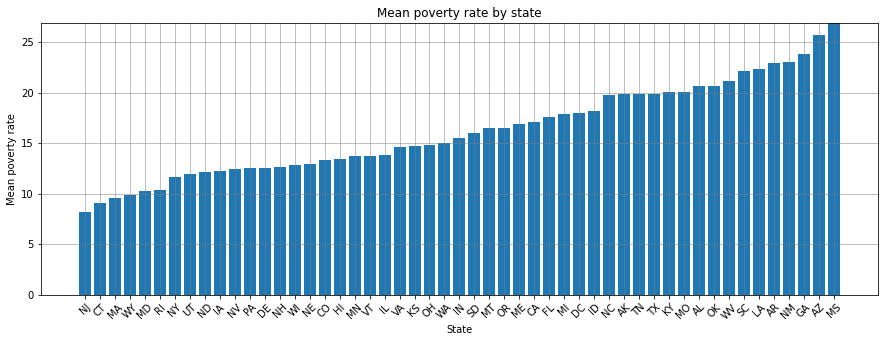

In [75]:
series_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values()
bar_chart(series_poverty, 15, 5, 'Mean poverty rate by state', 'State', 'Mean poverty rate', 45, 'mean_poverty_rate.png')

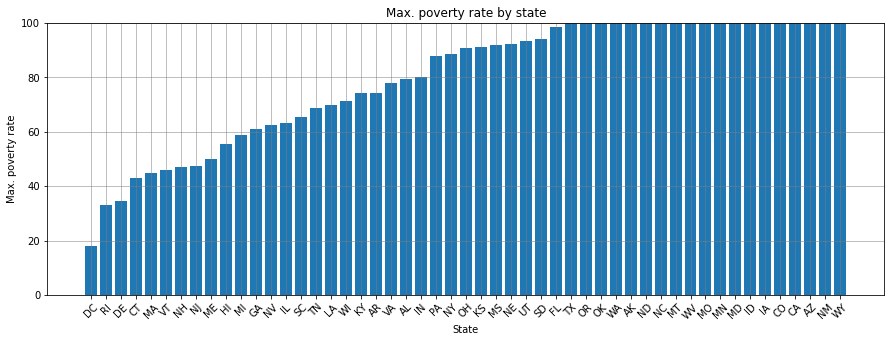

In [76]:
series_poverty_max = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].max().sort_values()
bar_chart(series_poverty_max, 15, 5, 'Max. poverty rate by state', 'State', 'Max. poverty rate', 45, 'max_poverty_rate.png')

<a id="Graduation_Rate"></a>
# Chart the High School Graduation Rate by US State
Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [67]:
csv_columns()
describe_dataframe(df_pct_completed_hs)

df_hh_income
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

df_pct_poverty
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

df_pct_completed_hs
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

df_share_race_city
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

df_fatalities
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.shape
(29329, 3)

df.columns
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

df.describe(include='all')
       Geographic Area           City percent_completed_hs
count            29329          29329                29329
unique              51          24255                  728
top                 PA  Franklin city 

In [70]:
df_pct_completed_hs['percent_completed_hs'].value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [71]:
df_pct_completed_hs.drop(df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] == '-'].index, inplace = True)
df_pct_completed_hs['percent_completed_hs'].value_counts()

100     1301
91.7     170
92.9     169
92.5     168
91.3     163
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 727, dtype: int64

In [72]:
print(type(df_pct_completed_hs['percent_completed_hs'][0]))
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)
print(type(df_pct_completed_hs['percent_completed_hs'][0]))

<class 'str'>
<class 'numpy.float64'>


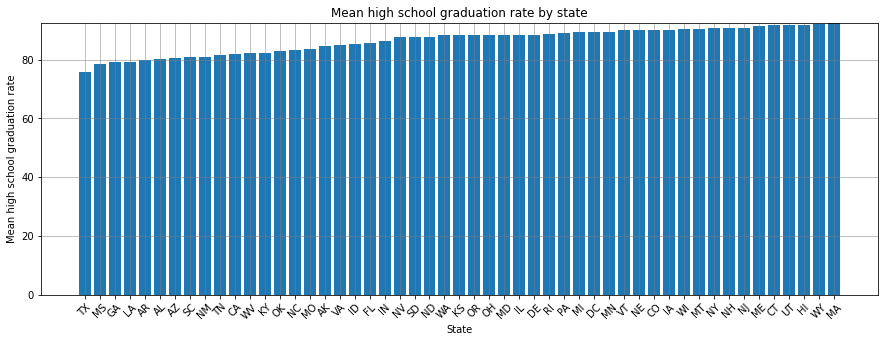

In [74]:
series_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()
bar_chart(series_graduation, 15, 5, 'Mean high school graduation rate by state', 'State', 'Mean high school graduation rate', 45, 'mean_graduation_rate.png')

<a id="Poverty_Graduation"></a>
# Visualise the Relationship between Poverty Rates and High School Graduation Rates
#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [77]:
series_poverty

Geographic Area
NJ    8.19
CT    9.14
MA    9.59
WY    9.89
MD   10.31
RI   10.37
NY   11.67
UT   11.98
ND   12.16
IA   12.29
NV   12.47
PA   12.52
DE   12.56
NH   12.66
WI   12.86
NE   12.98
CO   13.36
HI   13.40
MN   13.75
VT   13.79
IL   13.88
VA   14.59
KS   14.76
OH   14.85
WA   15.02
IN   15.50
SD   16.03
MT   16.51
OR   16.52
ME   16.89
CA   17.12
FL   17.57
MI   17.90
DC   18.00
ID   18.24
NC   19.75
AK   19.85
TN   19.89
TX   19.92
KY   20.08
MO   20.11
AL   20.65
OK   20.66
WV   21.13
SC   22.16
LA   22.34
AR   22.96
NM   23.08
GA   23.78
AZ   25.67
MS   26.88
Name: poverty_rate, dtype: float64

In [78]:
series_graduation

Geographic Area
TX   75.69
MS   78.47
GA   79.01
LA   79.29
AR   79.95
AL   80.30
AZ   80.47
SC   80.85
NM   80.98
TN   81.63
CA   81.96
WV   82.35
KY   82.37
OK   82.91
NC   83.25
MO   83.52
AK   84.63
VA   84.88
ID   85.17
FL   85.74
IN   86.32
NV   87.72
SD   87.75
ND   87.82
WA   88.20
KS   88.23
OR   88.30
OH   88.34
MD   88.42
IL   88.48
DE   88.52
RI   88.82
PA   89.02
MI   89.21
DC   89.30
MN   89.47
VT   89.98
NE   89.99
CO   90.11
IA   90.11
WI   90.26
MT   90.49
NY   90.61
NH   90.71
NJ   90.85
ME   91.43
CT   91.59
UT   91.62
HI   91.67
WY   92.10
MA   92.40
Name: percent_completed_hs, dtype: float64

In [80]:
df_poverty_graduation = pd.concat([series_poverty, series_graduation], axis=1)
df_poverty_graduation

,poverty_rate,percent_completed_hs
Geographic Area,,
NJ,8.19,90.85
CT,9.14,91.59
MA,9.59,92.40
WY,9.89,92.10
MD,10.31,88.42
RI,10.37,88.82
NY,11.67,90.61
UT,11.98,91.62
ND,12.16,87.82


In [84]:
series_grad = df_poverty_graduation['percent_completed_hs']

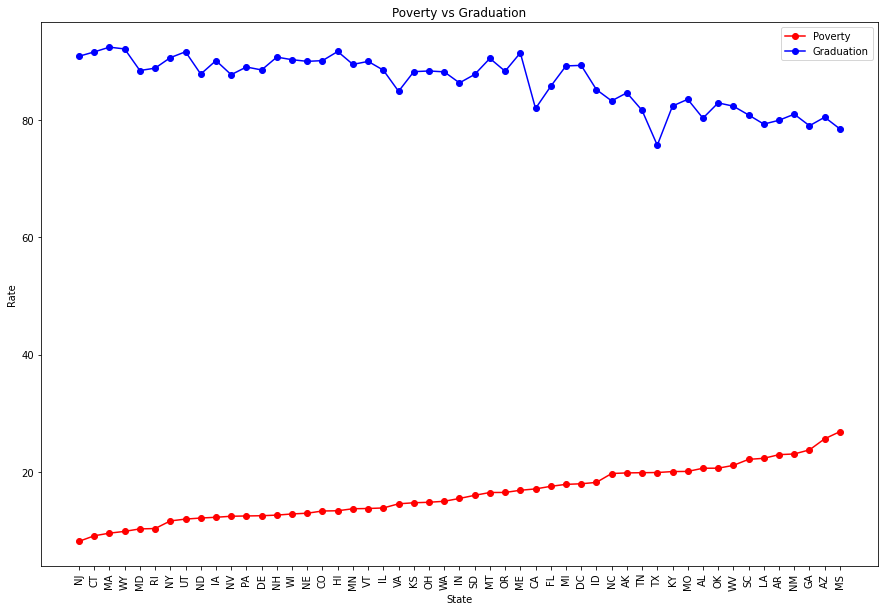

In [85]:
chart_2_lines(series_poverty, series_grad, 15, 10, "Poverty vs Graduation", "red", "Poverty", "blue", "Graduation", "State", "Rate", 90, "poverty_vs_graduation")

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

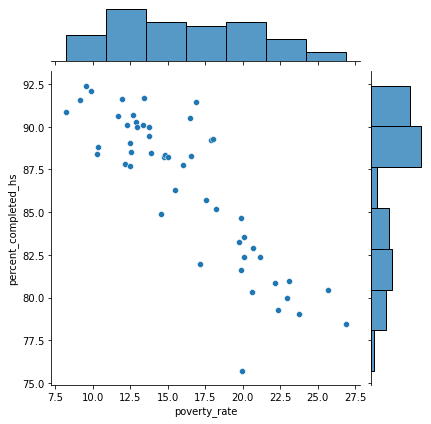

In [105]:
sns_plot = sns.jointplot(data=df_poverty_graduation, x="poverty_rate", y="percent_completed_hs")

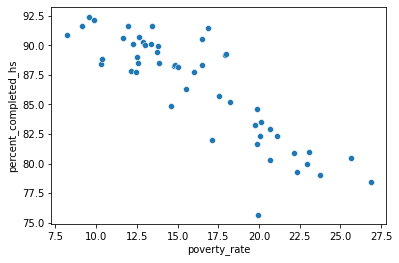

In [104]:
sns_plot = sns.scatterplot(data=df_poverty_graduation, x="poverty_rate", y="percent_completed_hs")
fig = sns_plot.get_figure()
fig.savefig("poverty_graduation_scatterplot.png")

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

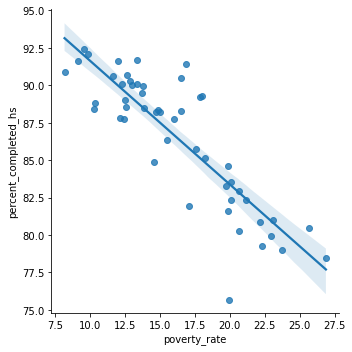

In [90]:
sns.lmplot(data=df_poverty_graduation, x="poverty_rate", y="percent_completed_hs")

<AxesSubplot:xlabel='poverty_rate', ylabel='percent_completed_hs'>

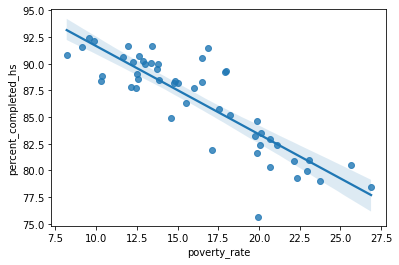

In [91]:
sns.regplot(data=df_poverty_graduation, x="poverty_rate", y="percent_completed_hs")

<a id="Racial_Makeup"></a>
# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State
Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [107]:
csv_columns()
describe_dataframe(df_share_race_city)

df_hh_income
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

df_pct_poverty
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

df_pct_completed_hs
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

df_share_race_city
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

df_fatalities
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.shape
(29268, 7)

df.columns
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

df.describe(include='all')
       Geographic area           City share_white share_black  \
count            29268          29268       29268       29268   
unique  

In [119]:
df_share_race_city[df_share_race_city['share_white'] == '(X)']

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
630,AK,Chisana CDP,(X),(X),(X),(X),(X)
678,AK,Flat CDP,(X),(X),(X),(X),(X)
777,AK,Mertarvik CDP,(X),(X),(X),(X),(X)
1946,CA,Almanor CDP,(X),(X),(X),(X),(X)
2134,CA,Caribou CDP,(X),(X),(X),(X),(X)
2160,CA,Cedar Slope CDP,(X),(X),(X),(X),(X)
3194,CA,Silver City CDP,(X),(X),(X),(X),(X)
3248,CA,Sugarloaf Mountain Park CDP,(X),(X),(X),(X),(X)
3331,CA,University of California Merced CDP,(X),(X),(X),(X),(X)
3345,CA,Valley Wells CDP,(X),(X),(X),(X),(X)


In [122]:
df_share_race_city.drop(df_share_race_city[df_share_race_city['share_white'] == '(X)'].index, inplace = True)

In [123]:
df_share_race_city[df_share_race_city['share_white'] == '(X)']

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic


In [143]:
for col in ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']:
    df_share_race_city = convert_dataframe_column_to_float(df_share_race_city, col)

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>


In [144]:
df_share_race_city.groupby('Geographic area')['share_white'].mean()

Geographic area
AK   45.65
AL   72.51
AR   78.45
AZ   59.93
CA   71.87
CO   87.77
CT   86.11
DC   38.50
DE   76.25
FL   78.67
GA   62.59
HI   33.37
IA   96.71
ID   88.82
IL   90.36
IN   94.82
KS   92.96
KY   92.23
LA   64.81
MA   89.67
MD   72.12
ME   95.69
MI   90.67
MN   91.80
MO   90.44
MS   53.80
MT   84.48
NC   71.52
ND   92.29
NE   94.72
NH   95.68
NJ   80.89
NM   65.42
NV   82.33
NY   88.88
OH   92.80
OK   72.93
OR   87.63
PA   93.25
RI   89.23
SC   61.98
SD   84.82
TN   88.95
TX   82.59
UT   89.44
VA   74.60
VT   95.87
WA   82.38
WI   92.96
WV   95.04
WY   92.37
Name: share_white, dtype: float64

In [145]:
type(df_share_race_city.groupby('Geographic area')['share_white'].mean())

pandas.core.series.Series

In [149]:
series_white = df_share_race_city.groupby('Geographic area')['share_white'].mean()
series_black = df_share_race_city.groupby('Geographic area')['share_black'].mean()
series_native_american = df_share_race_city.groupby('Geographic area')['share_native_american'].mean()
series_asian = df_share_race_city.groupby('Geographic area')['share_asian'].mean()
series_hispanic = df_share_race_city.groupby('Geographic area')['share_hispanic'].mean()

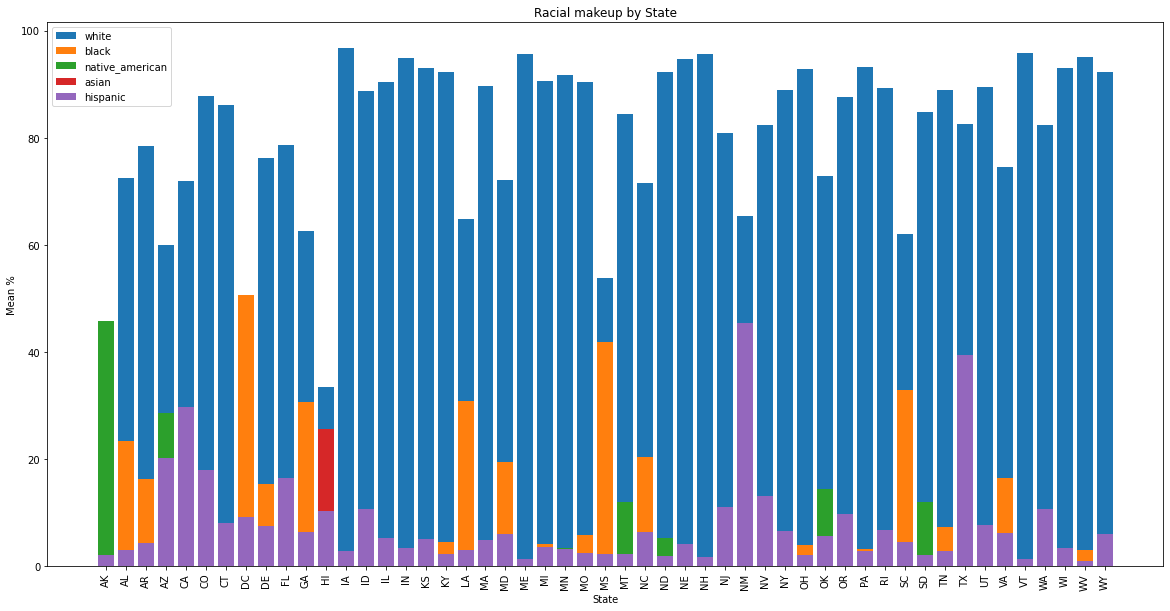

In [159]:
#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

X = series_white.index.tolist()
lst_white = series_white.tolist()
lst_black = series_black.tolist()
lst_native_american = series_native_american.tolist()
lst_asian = series_asian.tolist()
lst_hispanic = series_hispanic.tolist()
  
X_axis = np.arange(len(X))

width = 0.8
plt.bar(X_axis, lst_white, width, label = 'white')
plt.bar(X_axis, lst_black, width, label = 'black')
plt.bar(X_axis, lst_native_american, width, label = 'native_american')
plt.bar(X_axis, lst_asian, width, label = 'asian')
plt.bar(X_axis, lst_hispanic, width, label = 'hispanic')
  
plt.xticks(X_axis, X)
plt.xlabel("State")
plt.ylabel("Mean %")
plt.title("Racial makeup by State")
plt.legend()
plt.xticks(rotation=90)
plt.savefig("images/racial_makeup1.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

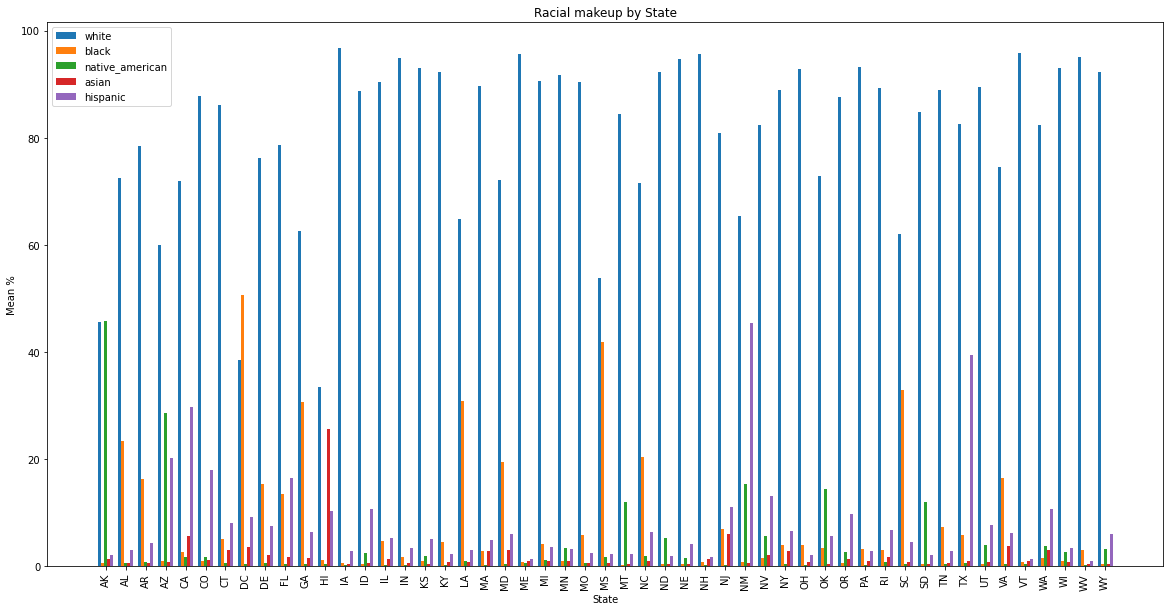

In [160]:
#plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize=(20,10))

X = series_white.index.tolist()
lst_white = series_white.tolist()
lst_black = series_black.tolist()
lst_native_american = series_native_american.tolist()
lst_asian = series_asian.tolist()
lst_hispanic = series_hispanic.tolist()
  
X_axis = np.arange(len(X))

width = 0.15
plt.bar(X_axis - 2*width, lst_white, width, label = 'white')
plt.bar(X_axis - width, lst_black, width, label = 'black')
plt.bar(X_axis , lst_native_american, width, label = 'native_american')
plt.bar(X_axis + width, lst_asian, width, label = 'asian')
plt.bar(X_axis + 2*width, lst_hispanic, width, label = 'hispanic')
  
plt.xticks(X_axis, X)
plt.xlabel("State")
plt.ylabel("Mean %")
plt.title("Racial makeup by State")
plt.legend()
plt.xticks(rotation=90)
plt.savefig("images/racial_makeup2.png", facecolor='white', transparent=False, bbox_inches = 'tight')
plt.show()

<a id="People_Killed"></a>
# Create Donut Chart by of People Killed by Race
Hint: Use `.value_counts()`

In [162]:
csv_columns()
describe_dataframe(df_fatalities)

df_hh_income
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

df_pct_poverty
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

df_pct_completed_hs
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

df_share_race_city
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

df_fatalities
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,25

In [175]:
series_race = df_fatalities['race'].value_counts()
series_race

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [176]:
type(series_race)

pandas.core.series.Series

In [180]:
df_race_killed = series_race.to_frame()
df_race_killed.rename(columns = {'race':'nr_killed'}, inplace = True)
df_race_killed

,nr_killed
W,1168
B,592
H,401
A,36
N,29
O,28


In [185]:
fig = px.pie(df_race_killed, values="nr_killed", names=df_race_killed.index, hole=.5)
fig.show()

<Figure size 432x288 with 0 Axes>

<a id="Men_Women"></a>
# Create a Chart Comparing the Total Number of Deaths of Men and Women
Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [186]:
csv_columns()
describe_dataframe(df_fatalities)

df_hh_income
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

df_pct_poverty
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

df_pct_completed_hs
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

df_share_race_city
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

df_fatalities
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,25

In [192]:
df_gender = df_fatalities.groupby('gender')['id'].count().to_frame()

In [193]:
df_gender.rename(columns = {'id':'nr_killed'}, inplace = True)
df_gender

,nr_killed
gender,
F,94
M,2160


In [194]:
data = df_gender['nr_killed']
cols = ['F', 'M']
fig = px.pie(values=data, names=cols, title='Gender')
fig.show()

<a id="Age_Manner"></a>
# Create a Box Plot Showing the Age and Manner of Death
Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [196]:
describe_dataframe(df_fatalities)

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,254.00             2254      2254            2254  2254 2,254.00   
unique      NaN             2249       846               2    67      NaN   
top         NaN  Michael Johnson  27/01/16            shot   gun      NaN   
freq        NaN                2         8            2100  1247      NaN   
mean   1,361.97              NaN       NaN             NaN   NaN    36.25   
std      767.76              NaN       NaN             NaN   NaN    12.84   
min        3.00              NaN       NaN             NaN   NaN     6.00   
25%      705.25              NaN       NaN             NaN   NaN    26.00   
50%    1,346.00              NaN       NaN   

In [198]:
df_fatalities_clean = df_fatalities.dropna(subset=['age'])
df_fatalities_clean

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.00,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [204]:
df_fatalities_clean['manner_of_death'].value_counts()

shot                2100
shot and Tasered     154
Name: manner_of_death, dtype: int64

In [205]:
for row in df_fatalities_clean.groupby(['manner_of_death'])['age']:
    print(row)

('shot', 0      53.00
1      47.00
3      32.00
4      39.00
5      18.00
        ... 
2519   16.00
2523   25.00
2525   39.00
2533   28.00
2534   32.00
Name: age, Length: 2100, dtype: float64)
('shot and Tasered', 2      23.00
10     25.00
23     29.00
38     48.00
43     67.00
        ... 
2342   21.00
2385   30.00
2388   29.00
2395   45.00
2403   20.00
Name: age, Length: 154, dtype: float64)


In [211]:
seriesgroupby = df_fatalities_clean.groupby(['manner_of_death'])['age']
df = seriesgroupby.apply(pd.DataFrame)
df

,shot,shot and Tasered
0,53.00,NaN
1,47.00,NaN
2,NaN,23.00
3,32.00,NaN
4,39.00,NaN
...,...,...
2519,16.00,NaN
2523,25.00,NaN
2525,39.00,NaN
2533,28.00,NaN


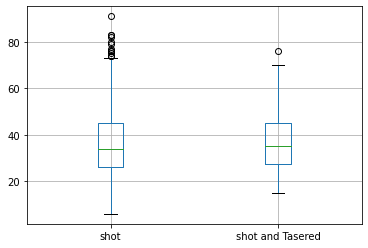

In [212]:
boxplot = df.boxplot(column=['shot', 'shot and Tasered']) 

In [213]:
seriesgroupby = df_fatalities_clean.groupby(['gender', 'manner_of_death'])['age']
df = seriesgroupby.apply(pd.DataFrame)
df

F                      M                 
     shot shot and Tasered  shot shot and Tasered
0     NaN              NaN 53.00              NaN
1     NaN              NaN 47.00              NaN
2     NaN              NaN   NaN            23.00
3     NaN              NaN 32.00              NaN
4     NaN              NaN 39.00              NaN
...   ...              ...   ...              ...
2519  NaN              NaN 16.00              NaN
2523  NaN              NaN 25.00              NaN
2525  NaN              NaN 39.00              NaN
2533  NaN              NaN 28.00              NaN
2534  NaN              NaN 32.00              NaN

[2254 rows x 4 columns]

In [216]:
df.columns

MultiIndex([('F',             'shot'),
            ('F', 'shot and Tasered'),
            ('M',             'shot'),
            ('M', 'shot and Tasered')],
           )

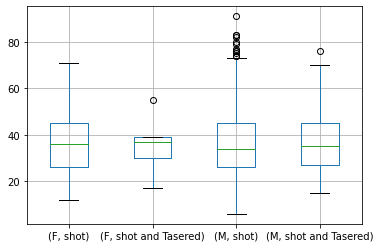

In [218]:
#boxplot = df.boxplot(column=['F-shot', 'F-shot and Tasered', 'M-shot', 'M-shot and Tasered']) 
boxplot = df.boxplot(column=[
    ('F',             'shot'),
    ('F', 'shot and Tasered'),
    ('M',             'shot'),
    ('M', 'shot and Tasered')
]) 

<a id="Armed"></a>
# Were People Armed? 
In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [219]:
describe_dataframe(df_fatalities)

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,254.00             2254      2254            2254  2254 2,254.00   
unique      NaN             2249       846               2    67      NaN   
top         NaN  Michael Johnson  27/01/16            shot   gun      NaN   
freq        NaN                2         8            2100  1247      NaN   
mean   1,361.97              NaN       NaN             NaN   NaN    36.25   
std      767.76              NaN       NaN             NaN   NaN    12.84   
min        3.00              NaN       NaN             NaN   NaN     6.00   
25%      705.25              NaN       NaN             NaN   NaN    26.00   
50%    1,346.00              NaN       NaN   

In [220]:
df_fatalities['armed'].value_counts()

gun            1247
knife           324
unarmed         165
vehicle         158
toy weapon      102
               ... 
chain saw         1
garden tool       1
pole              1
pick-axe          1
pen               1
Name: armed, Length: 67, dtype: int64

In [226]:
unarmed = df_fatalities[df_fatalities['armed'] == "unarmed"]['armed'].count()
armed = df_fatalities[df_fatalities['armed'] != "unarmed"]['armed'].count()
total = df_fatalities['armed'].count()
print(f"unarmed={unarmed}, armed={armed}, total={total}, %armed={round(100*armed/total, 2)}%")

unarmed=165, armed=2089, total=2254, %armed=92.68%


In [232]:
series_armed = df_fatalities.groupby(['armed'])['id'].count().sort_values()
series_armed

armed
lawn mower blade       1
flagpole               1
flashlight             1
garden tool            1
glass shard            1
                    ... 
toy weapon           102
vehicle              158
unarmed              165
knife                324
gun                 1247
Name: id, Length: 67, dtype: int64

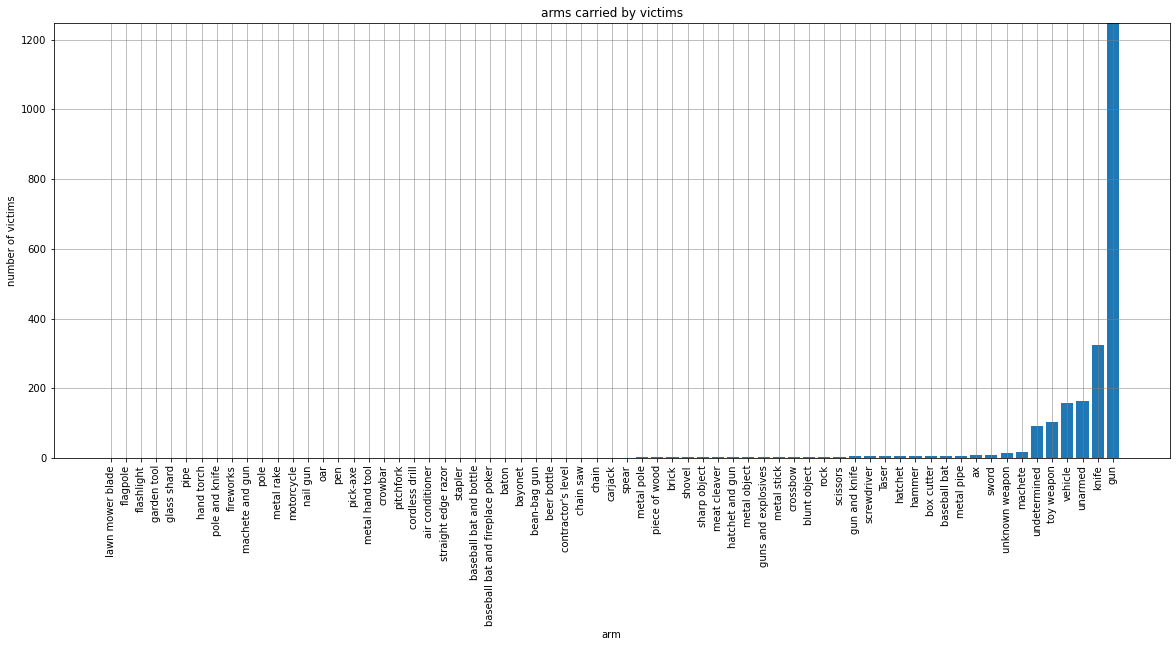

In [233]:
bar_chart(series_armed, 20, 8, "arms carried by victims", 'arm', 'number of victims', 90, "arms_carried.png")

<a id="Age"></a>
# How Old Were the People Killed?


Work out what percentage of people killed were under 25 years old.  

In [234]:
describe_dataframe(df_fatalities)

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,254.00             2254      2254            2254  2254 2,254.00   
unique      NaN             2249       846               2    67      NaN   
top         NaN  Michael Johnson  27/01/16            shot   gun      NaN   
freq        NaN                2         8            2100  1247      NaN   
mean   1,361.97              NaN       NaN             NaN   NaN    36.25   
std      767.76              NaN       NaN             NaN   NaN    12.84   
min        3.00              NaN       NaN             NaN   NaN     6.00   
25%      705.25              NaN       NaN             NaN   NaN    26.00   
50%    1,346.00              NaN       NaN   

In [236]:
df_fatalities_clean = df_fatalities.dropna(subset=['age'])
df_fatalities_clean['age']

0      53.00
1      47.00
2      23.00
3      32.00
4      39.00
        ... 
2519   16.00
2523   25.00
2525   39.00
2533   28.00
2534   32.00
Name: age, Length: 2254, dtype: float64

In [237]:
type(df_fatalities_clean['age'][0])

numpy.float64

In [242]:
series_age = df_fatalities_clean.groupby(['age'])['id'].count().sort_index()
series_age

age
6.00     1
12.00    1
13.00    1
14.00    1
15.00    7
        ..
79.00    1
80.00    1
82.00    1
83.00    2
91.00    1
Name: id, Length: 72, dtype: int64

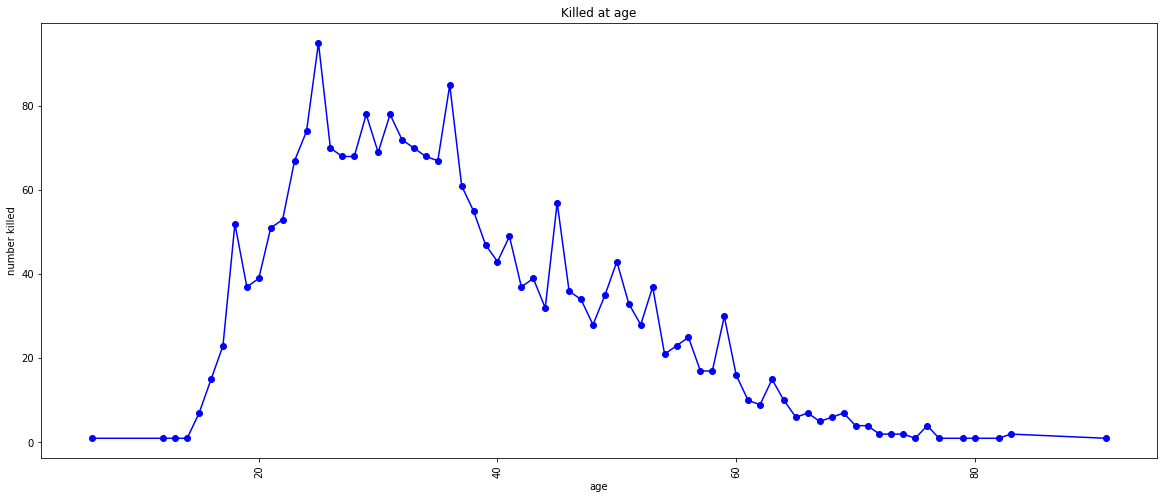

In [243]:
line_chart(series_age, 20, 8, "Killed at age", "blue", "age", "age", "number killed", 90, "killed_at_age.png")

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

<AxesSubplot:ylabel='Frequency'>

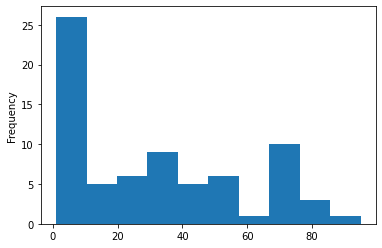

In [244]:
series_age.plot(kind = 'hist')

<AxesSubplot:>

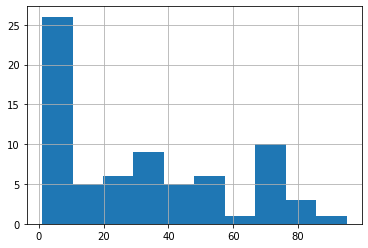

In [245]:
series_age.hist()

<AxesSubplot:>

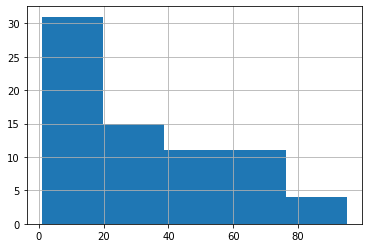

In [246]:
series_age.hist(bins = 5)

In [248]:
df = series_age.to_frame()
df.rename(columns={"id": "nr_killed"}, inplace=True)
df


,nr_killed
age,
6.00,1
12.00,1
13.00,1
14.00,1
15.00,7
...,...
79.00,1
80.00,1
82.00,1


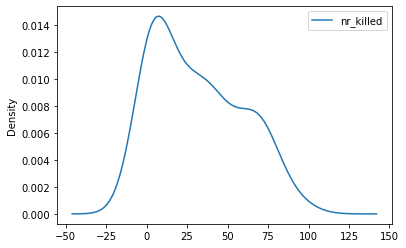

In [249]:
df.plot.density()
plt.savefig('kde.png')

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [250]:
df_fatalities['race'].value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [253]:
series_W = df_fatalities[df_fatalities['race'] == "W"]['age']
series_B = df_fatalities[df_fatalities['race'] == "B"]['age']
series_H = df_fatalities[df_fatalities['race'] == "H"]['age']
series_A = df_fatalities[df_fatalities['race'] == "A"]['age']
series_N = df_fatalities[df_fatalities['race'] == "N"]['age']
series_O = df_fatalities[df_fatalities['race'] == "O"]['age']
print(series_W)

1      47.00
3      32.00
5      18.00
7      35.00
8      34.00
        ... 
2512   59.00
2514   34.00
2515   31.00
2516   23.00
2517   28.00
Name: age, Length: 1168, dtype: float64


In [254]:
series_age = df_fatalities_clean.groupby(['age'])['id'].count().sort_index()
series_age

age
6.00     1
12.00    1
13.00    1
14.00    1
15.00    7
        ..
79.00    1
80.00    1
82.00    1
83.00    2
91.00    1
Name: id, Length: 72, dtype: int64

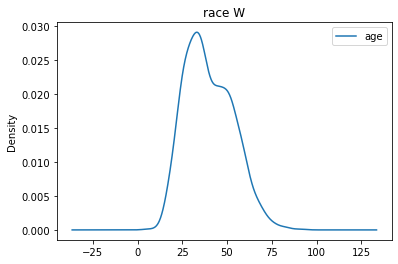

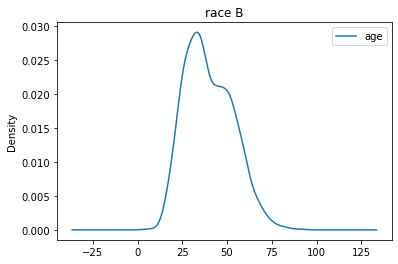

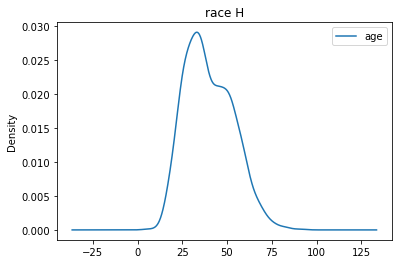

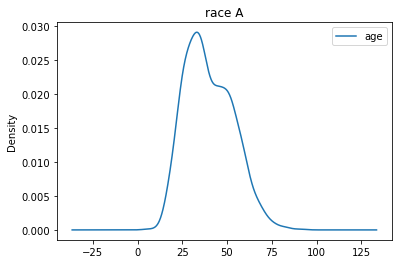

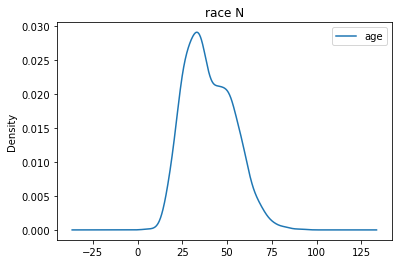

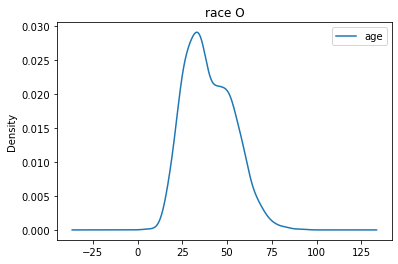

In [259]:
def plot_density(series, race):
    df = series.to_frame()
    df.plot.density(title=f"race {race}")
    plt.savefig(f'images/killed_at_age_for_race_{race}.png')

plot_density(series_W, "W")
plot_density(series_W, "B")
plot_density(series_W, "H")
plot_density(series_W, "A")
plot_density(series_W, "N")
plot_density(series_W, "O")

<a id="Race"></a>
# Race of People Killed
Create a chart that shows the total number of people killed by race. 

In [260]:
describe_dataframe(df_fatalities)

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,254.00             2254      2254            2254  2254 2,254.00   
unique      NaN             2249       846               2    67      NaN   
top         NaN  Michael Johnson  27/01/16            shot   gun      NaN   
freq        NaN                2         8            2100  1247      NaN   
mean   1,361.97              NaN       NaN             NaN   NaN    36.25   
std      767.76              NaN       NaN             NaN   NaN    12.84   
min        3.00              NaN       NaN             NaN   NaN     6.00   
25%      705.25              NaN       NaN             NaN   NaN    26.00   
50%    1,346.00              NaN       NaN   

In [264]:
series_race = df_fatalities.groupby(['race'])['id'].count()
series_race

race
A      36
B     592
H     401
N      29
O      28
W    1168
Name: id, dtype: int64

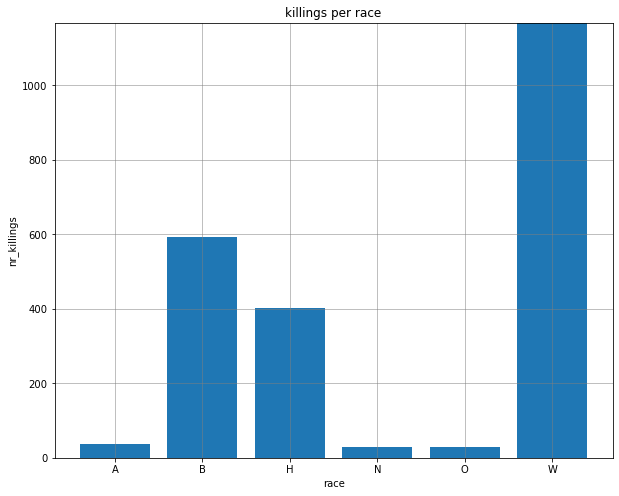

In [266]:
bar_chart(series_race, 10, 8, "killings per race", "race", "nr_killings", 0, "killings_per_race.png")

<a id="Mental"></a>
# Mental Illness and Police Killings
What percentage of people killed by police have been diagnosed with a mental illness?

In [267]:
describe_dataframe(df_fatalities)

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,254.00             2254      2254            2254  2254 2,254.00   
unique      NaN             2249       846               2    67      NaN   
top         NaN  Michael Johnson  27/01/16            shot   gun      NaN   
freq        NaN                2         8            2100  1247      NaN   
mean   1,361.97              NaN       NaN             NaN   NaN    36.25   
std      767.76              NaN       NaN             NaN   NaN    12.84   
min        3.00              NaN       NaN             NaN   NaN     6.00   
25%      705.25              NaN       NaN             NaN   NaN    26.00   
50%    1,346.00              NaN       NaN   

In [283]:
series_ill = df_fatalities['signs_of_mental_illness'].value_counts()
series_ill

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

In [285]:
series_ill.index


Index([False, True], dtype='object')

In [300]:
print(f"% killed with mental problem = {round(100 * series_ill[1] / (series_ill[0] + series_ill[1]), 2)}")

% killed with mental problem = 25.42


<a id="Cities"></a>
# In Which Cities Do the Most Police Killings Take Place?
Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [302]:
describe_dataframe(df_fatalities)

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,254.00             2254      2254            2254  2254 2,254.00   
unique      NaN             2249       846               2    67      NaN   
top         NaN  Michael Johnson  27/01/16            shot   gun      NaN   
freq        NaN                2         8            2100  1247      NaN   
mean   1,361.97              NaN       NaN             NaN   NaN    36.25   
std      767.76              NaN       NaN             NaN   NaN    12.84   
min        3.00              NaN       NaN             NaN   NaN     6.00   
25%      705.25              NaN       NaN             NaN   NaN    26.00   
50%    1,346.00              NaN       NaN   

In [308]:
series_city = df_fatalities.groupby(['city'])['id'].count().sort_values()[-10:]
series_city

city
St. Louis      14
Miami          15
San Antonio    15
Columbus       16
Las Vegas      17
Austin         18
Chicago        22
Houston        24
Phoenix        28
Los Angeles    35
Name: id, dtype: int64

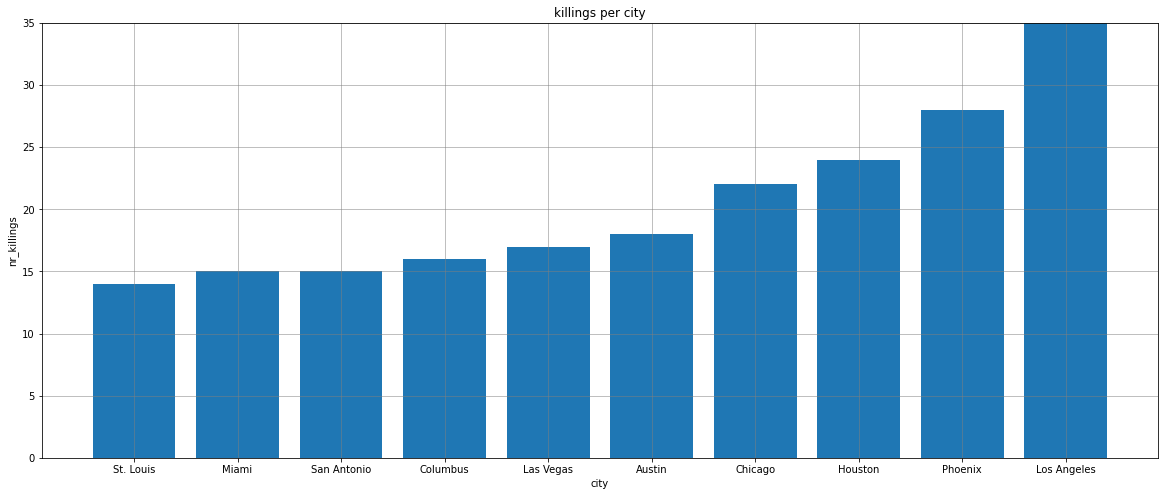

In [309]:
bar_chart(series_city, 20, 8, "killings per city", "city", "nr_killings", 0, "killings_per_city.png")

<a id="Death_Race"></a>
# Rate of Death by Race
Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [310]:
describe_dataframe(df_fatalities)

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,254.00             2254      2254            2254  2254 2,254.00   
unique      NaN             2249       846               2    67      NaN   
top         NaN  Michael Johnson  27/01/16            shot   gun      NaN   
freq        NaN                2         8            2100  1247      NaN   
mean   1,361.97              NaN       NaN             NaN   NaN    36.25   
std      767.76              NaN       NaN             NaN   NaN    12.84   
min        3.00              NaN       NaN             NaN   NaN     6.00   
25%      705.25              NaN       NaN             NaN   NaN    26.00   
50%    1,346.00              NaN       NaN   

In [311]:
series_city = df_fatalities.groupby(['city'])['id'].count().sort_values()[-10:]
series_city

city
St. Louis      14
Miami          15
San Antonio    15
Columbus       16
Las Vegas      17
Austin         18
Chicago        22
Houston        24
Phoenix        28
Los Angeles    35
Name: id, dtype: int64

In [313]:
city_list = list(series_city.index)
city_list

['St. Louis',
 'Miami',
 'San Antonio',
 'Columbus',
 'Las Vegas',
 'Austin',
 'Chicago',
 'Houston',
 'Phoenix',
 'Los Angeles']

In [317]:
for city in city_list:
    df = df_fatalities[df_fatalities['city'] == city]
    print(city)
    print(df.groupby(['race'])['id'].count())
    print()

St. Louis
race
B    11
W     3
Name: id, dtype: int64

Miami
race
B    7
H    6
W    2
Name: id, dtype: int64

San Antonio
race
B     2
H    11
W     2
Name: id, dtype: int64

Columbus
race
B    9
O    1
W    6
Name: id, dtype: int64

Las Vegas
race
B    3
H    5
W    9
Name: id, dtype: int64

Austin
race
B     3
H     2
W    13
Name: id, dtype: int64

Chicago
race
B    19
H     1
W     2
Name: id, dtype: int64

Houston
race
A     1
B    14
H     5
N     1
W     3
Name: id, dtype: int64

Phoenix
race
B     2
H    11
N     3
W    12
Name: id, dtype: int64

Los Angeles
race
A     1
B    10
H    18
W     6
Name: id, dtype: int64



<a id="Police_Killings"></a>
# Create a Choropleth Map of Police Killings by US State
Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [319]:
describe_dataframe(df_fatalities)

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,254.00             2254      2254            2254  2254 2,254.00   
unique      NaN             2249       846               2    67      NaN   
top         NaN  Michael Johnson  27/01/16            shot   gun      NaN   
freq        NaN                2         8            2100  1247      NaN   
mean   1,361.97              NaN       NaN             NaN   NaN    36.25   
std      767.76              NaN       NaN             NaN   NaN    12.84   
min        3.00              NaN       NaN             NaN   NaN     6.00   
25%      705.25              NaN       NaN             NaN   NaN    26.00   
50%    1,346.00              NaN       NaN   

In [326]:
df_killings_by_state = df_fatalities.groupby(['state'])['id'].count().to_frame()
df_killings_by_state.rename(columns={"id": "nr_killings"}, inplace=True)
df_killings_by_state

,nr_killings
state,
AK,14
AL,45
AR,20
AZ,105
CA,366
CO,63
CT,7
DC,11
DE,8


In [327]:
df_killings_by_state.columns

Index(['nr_killings'], dtype='object')

In [331]:
df_killings_by_state.reset_index(inplace=True)
df_killings_by_state

,state,nr_killings
0,AK,14
1,AL,45
2,AR,20
3,AZ,105
4,CA,366
5,CO,63
6,CT,7
7,DC,11
8,DE,8
9,FL,136


In [334]:
import plotly.express as px
fig = px.choropleth(data_frame=df_killings_by_state, 
                    locations='state',
                    locationmode='USA-states',
                    color='nr_killings',
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    color_continuous_scale="matter",
                    hover_name='state',
                    projection='albers usa'
                   )
#fig.update_layout (title_text = 'Number of launches');
fig.update_layout(title_text = 'Number of killings by police', title_x = 0.5);    # title_x, title_y in [0,1]
#fig.write_image("choropleth_Nr_launches.png")
fig.show()

In [318]:
import plotly.express as px

fig = px.choropleth(locations=["CA", "TX", "NY"], locationmode="USA-states", color=[1,2,3], scope="usa")
fig.show()

<a id="Time"></a>
# Number of Police Killings Over Time
Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [335]:
describe_dataframe(df_fatalities)

df.shape
(2254, 14)

df.columns
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

df.describe(include='all')
             id             name      date manner_of_death armed      age  \
count  2,254.00             2254      2254            2254  2254 2,254.00   
unique      NaN             2249       846               2    67      NaN   
top         NaN  Michael Johnson  27/01/16            shot   gun      NaN   
freq        NaN                2         8            2100  1247      NaN   
mean   1,361.97              NaN       NaN             NaN   NaN    36.25   
std      767.76              NaN       NaN             NaN   NaN    12.84   
min        3.00              NaN       NaN             NaN   NaN     6.00   
25%      705.25              NaN       NaN             NaN   NaN    26.00   
50%    1,346.00              NaN       NaN   

In [336]:
df_fatalities['date']

0       02/01/15
1       02/01/15
2       03/01/15
3       04/01/15
4       04/01/15
          ...   
2519    25/07/17
2523    26/07/17
2525    27/07/17
2533    31/07/17
2534    31/07/17
Name: date, Length: 2254, dtype: object

In [337]:
def get_year(date):
    lst = date.split('/')
    year = lst[2]
    return year
    
df_fatalities['year'] = df_fatalities['date'].apply(get_year)
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,15
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,15
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,15
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,15
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.00,M,B,Marion,AR,False,undetermined,Not fleeing,False,17
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False,17
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False,17
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,17


In [341]:
series = df_fatalities.groupby(['year'])['id'].count()
series

year
15    947
16    873
17    434
Name: id, dtype: int64

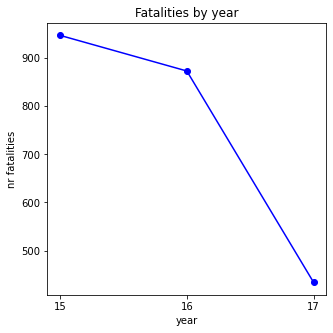

In [342]:
line_chart(series, 5, 5, "Fatalities by year", "blue", "", "year", "nr fatalities", 0, "fatalities_by_year.png")

In [343]:
def get_year_month(date):
    lst = date.split('/')
    year = lst[2]
    return year + "_" + lst[1]
    
df_fatalities['year_month'] = df_fatalities['date'].apply(get_year_month)
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,year_month
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,15,15_01
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,15,15_01
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,15,15_01
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,15,15_01
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,15,15_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.00,M,B,Marion,AR,False,undetermined,Not fleeing,False,17,17_07
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False,17,17_07
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False,17,17_07
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,17,17_07


In [345]:
series = df_fatalities.groupby(['year_month'])['id'].count()
series

year_month
15_01     75
15_02     76
15_03     91
15_04     83
15_05     69
15_06     63
15_07    100
15_08     89
15_09     79
15_10     73
15_11     73
15_12     76
16_01     80
16_02     85
16_03     89
16_04     72
16_05     67
16_06     81
16_07     66
16_08     76
16_09     70
16_10     66
16_11     65
16_12     56
17_01     89
17_02     90
17_03     64
17_04     51
17_05     57
17_06     56
17_07     27
Name: id, dtype: int64

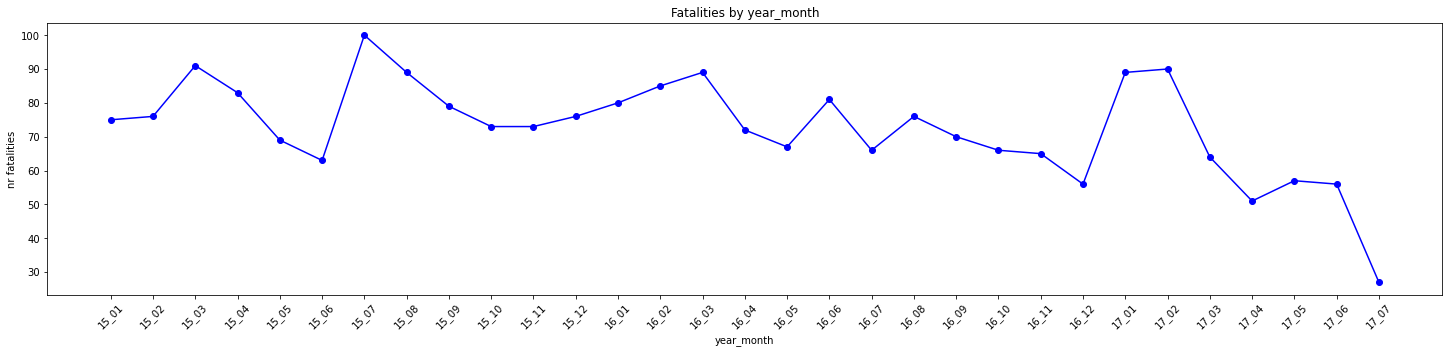

In [347]:
line_chart(series, 25, 5, "Fatalities by year_month", "blue", "", "year_month", "nr fatalities", 45, "fatalities_by_month.png")

<a id="Epilogue"></a>
# Epilogue
Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).